# Machine Learning

# Bag of Words Extraction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load your dataset
insta_df = pd.read_csv('/content/drive/MyDrive/MSC Data science/Thesis/Final data/clean_insta.csv')
#rename column
insta_df.rename(columns={"joined_text":"text"},inplace=True)

In [ ]:
# Drop rows with NaN values from 'text' column
insta_df.dropna(subset=['text'], inplace=True)

In [ ]:
X = insta_df['text']
# #encode for train
y,class_names = pd.factorize(insta_df['label'])

# Splitting the data into 80-20 train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(4488,)
(1122,)
(4488,)
(1122,)


In [ ]:
# Apply CountVectorizer to text data
count_vectorizer = CountVectorizer(max_features=5000) # max_features
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

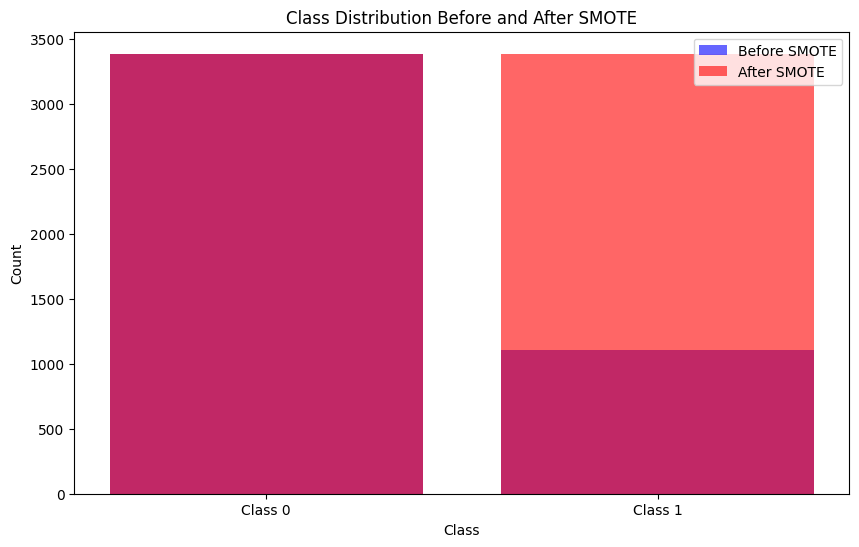

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the classes labeled as 0 and 1
original_class_counts = np.bincount(y_train)
resampled_class_counts = np.bincount(y_train_resampled)

plt.figure(figsize=(10, 6))
plt.bar(['Class 0', 'Class 1'], original_class_counts, color='b', alpha=0.6, label='Before SMOTE')
plt.bar(['Class 0', 'Class 1'], resampled_class_counts, color='r', alpha=0.6, label='After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before and After SMOTE')
plt.legend()
plt.show()


In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_model.predict(X_test_counts)

print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_predictions))

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       843
           1       0.42      0.62      0.50       279

    accuracy                           0.69      1122
   macro avg       0.63      0.67      0.64      1122
weighted avg       0.74      0.69      0.71      1122



In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, C=1)
logreg_model.fit(X_train_resampled, y_train_resampled)
logreg_predictions = logreg_model.predict(X_test_counts)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       843
           1       0.47      0.61      0.53       279

    accuracy                           0.73      1122
   macro avg       0.66      0.69      0.67      1122
weighted avg       0.76      0.73      0.74      1122



In [ ]:
# Naive Bayes
naive_bayes_model = MultinomialNB(alpha=1.0)
naive_bayes_model.fit(X_train_resampled, y_train_resampled)
naive_bayes_predictions = naive_bayes_model.predict(X_test_counts)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       843
           1       0.53      0.66      0.59       279

    accuracy                           0.77      1122
   macro avg       0.71      0.73      0.72      1122
weighted avg       0.79      0.77      0.78      1122



## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF vectorization to text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_model.predict(X_test_tfidf)

print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_predictions))

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       843
           1       0.56      0.60      0.58       279

    accuracy                           0.78      1122
   macro avg       0.71      0.72      0.72      1122
weighted avg       0.79      0.78      0.79      1122



In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, C=1)
logreg_model.fit(X_train_resampled, y_train_resampled)
logreg_predictions = logreg_model.predict(X_test_tfidf)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       843
           1       0.61      0.61      0.61       279

    accuracy                           0.81      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.81      0.81      0.81      1122



In [ ]:
# Naive Bayes
naive_bayes_model = MultinomialNB(alpha=1.0)
naive_bayes_model.fit(X_train_resampled, y_train_resampled)
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       843
           1       0.48      0.75      0.59       279

    accuracy                           0.74      1122
   macro avg       0.69      0.74      0.70      1122
weighted avg       0.80      0.74      0.75      1122

